In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix,f1_score,recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Configuration

In [32]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 6)

# Load  the Data

In [3]:
df=pd.read_csv('BreastCancer_processed.csv')
df.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,6,1,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
1,7,1,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
2,10,1,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
3,11,1,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,...,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
4,13,1,15.85,23.95,103.7,782.7,0.08401,0.10020,0.09938,0.05364,...,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287


In [4]:
df=df.drop(columns='Unnamed: 0')
df = df.rename(columns={'concave points_se': 'concave_points_se', 'concave points_worst': 'concave_points_worst','concave points_mean': 'concave_points_mean'})

In [15]:
#segregate the data into separate variables so that the features and the labels are separated.
X=df.drop(columns='diagnosis')
y=df[['diagnosis']]

# Split the data

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80)

# Train a Random Forest Classifier

In [53]:

clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train, y_train)


C:\Users\USER~1.DES\AppData\Local\Temp/ipykernel_17184/2440202584.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


# Obtain feature importance

In [42]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

perimeter_worst            0.172052
radius_worst               0.104356
concave_points_worst       0.092309
concavity_mean             0.078287
area_worst                 0.074312
area_se                    0.061402
perimeter_mean             0.054728
concavity_worst            0.043069
area_mean                  0.041615
radius_mean                0.038509
radius_se                  0.036386
perimeter_se               0.027097
texture_mean               0.021739
concave_points_mean        0.017968
texture_worst              0.016412
compactness_worst          0.015271
smoothness_worst           0.011597
symmetry_mean              0.011242
symmetry_worst             0.011030
fractal_dimension_worst    0.010061
symmetry_se                0.009656
compactness_se             0.007724
compactness_mean           0.007340
texture_se                 0.006649
smoothness_se              0.006374
fractal_dimension_mean     0.006353
concavity_se               0.006319
concave_points_se          0

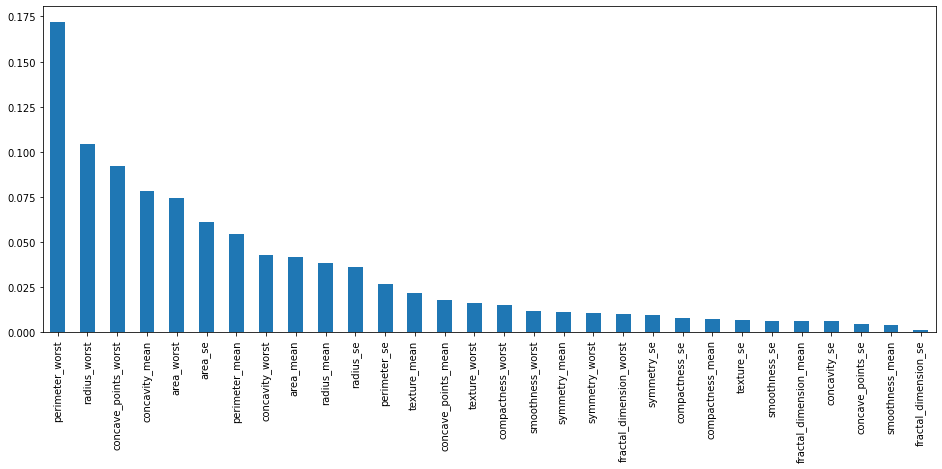

In [44]:
feature_scores.plot(kind='bar');

In [54]:
# Predict on the test set results
y_pred = clf.predict(X_test)
# performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       241
           1       0.89      0.85      0.87        78

    accuracy                           0.94       319
   macro avg       0.92      0.91      0.91       319
weighted avg       0.94      0.94      0.94       319



# Train using the DecisionTreeClassifier

In [58]:
# decision tree
tree=DecisionTreeClassifier(max_depth=100,random_state=0)
tree.fit(X_train,y_train)

#measures accuracy
predictions=tree.predict(X_test)
score=accuracy_score(y_test,predictions)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       241
           1       0.86      0.73      0.79        78

    accuracy                           0.91       319
   macro avg       0.89      0.85      0.87       319
weighted avg       0.90      0.91      0.90       319



In [56]:
# view the feature scores

feature_scores_tr = pd.Series( tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores_tr


perimeter_worst            0.652856
smoothness_worst           0.183295
texture_worst              0.100424
symmetry_mean              0.063426
radius_mean                0.000000
concavity_se               0.000000
symmetry_worst             0.000000
concave_points_worst       0.000000
concavity_worst            0.000000
compactness_worst          0.000000
area_worst                 0.000000
radius_worst               0.000000
fractal_dimension_se       0.000000
symmetry_se                0.000000
concave_points_se          0.000000
compactness_se             0.000000
texture_mean               0.000000
smoothness_se              0.000000
area_se                    0.000000
perimeter_se               0.000000
texture_se                 0.000000
radius_se                  0.000000
fractal_dimension_mean     0.000000
concave_points_mean        0.000000
concavity_mean             0.000000
compactness_mean           0.000000
smoothness_mean            0.000000
area_mean                  0

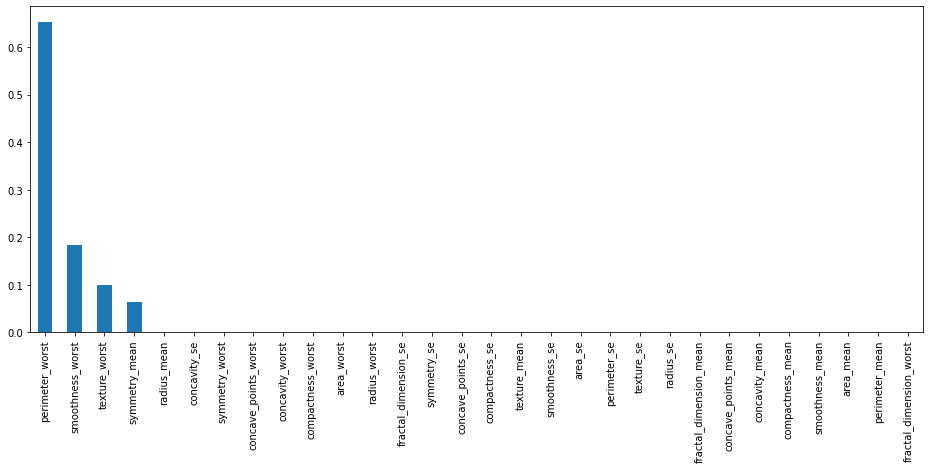

In [57]:
feature_scores_tr.plot(kind='bar');

# Train using the Logistic Linear Regression

In [59]:
lr = LogisticRegression()
lr.fit(X_train,y_train)


C:\Users\user.DESKTOP-OMQ89VA\anaconda3\envs\environment_name\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user.DESKTOP-OMQ89VA\anaconda3\envs\environment_name\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
#measures accuracy
predictions=lr.predict(X_test)
score=accuracy_score(y_test,predictions)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       241
           1       0.93      0.81      0.86        78

    accuracy                           0.94       319
   macro avg       0.93      0.89      0.91       319
weighted avg       0.94      0.94      0.94       319



In [63]:
# view the feature scores

feature_scores_lr = pd.Series( lr.coef_[0], index=X_train.columns).sort_values(ascending=False)

feature_scores_lr


texture_worst              0.580741
concavity_worst            0.268777
compactness_worst          0.166594
perimeter_worst            0.126025
area_se                    0.098926
concavity_mean             0.095988
concave_points_worst       0.079935
texture_se                 0.069232
area_worst                 0.058915
compactness_mean           0.056798
concave_points_mean        0.041902
symmetry_worst             0.030369
smoothness_worst           0.025748
symmetry_mean              0.021472
concavity_se               0.019734
fractal_dimension_worst    0.013985
compactness_se             0.011892
smoothness_mean            0.009250
concave_points_se          0.005588
fractal_dimension_mean     0.002117
smoothness_se              0.001531
fractal_dimension_se       0.001514
symmetry_se               -0.000302
area_mean                 -0.009411
radius_se                 -0.022425
perimeter_se              -0.104696
radius_mean               -0.462552
perimeter_mean            -0

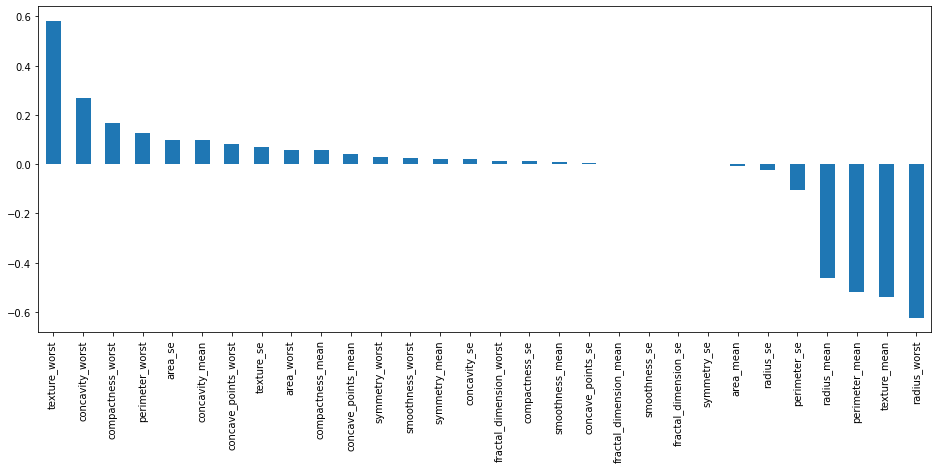

In [64]:
feature_scores_lr.plot(kind='bar');

# Selecting the most important features from the best model

### The best 15 features according to the Random forest classifier have been selected

In [68]:
best_df=df[['diagnosis','perimeter_worst','radius_worst','concave_points_worst',
          'concavity_mean','area_worst','area_se','perimeter_mean','concavity_worst',
         'area_mean','radius_mean','radius_se','perimeter_se','texture_mean','concave_points_mean','texture_worst']].copy()

In [70]:
best_df.to_csv('best_features.csv')

# Selecting the least important features from the best model

### The least important 15 features according to the Random forest classifier have been selected

In [71]:
worst_df=df[['compactness_worst','smoothness_worst','symmetry_mean','symmetry_worst','fractal_dimension_worst','symmetry_se',
            'compactness_se','compactness_mean','texture_se','smoothness_se','fractal_dimension_mean',
            'concavity_se','concave_points_se','smoothness_mean','fractal_dimension_se']].copy()

In [73]:
worst_df.to_csv('worst_features.csv')